In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds


%matplotlib inline  

In [2]:
b1 = tsds.load_ozone_exogenous_categorical()
df = b1.mPastData

      Date  Month Exog2 Exog3 Exog4  Ozone       Time  Ozone2
0  1955-01   1955     1    AQ   P_R    2.7 1955-01-01     2.7
1  1955-02   1955     2    AR   P_R    2.0 1955-02-01     2.0
2  1955-03   1955     3    AS   P_S    3.6 1955-03-01     3.6
3  1955-04   1955     4    AT   P_U    5.0 1955-04-01     5.0
4  1955-05   1955     5    AU   P_V    6.5 1955-05-01     6.5


In [3]:
df.head()

,Date,Month,Exog2,Exog3,Exog4,Ozone,Time,Ozone2
0,1955-01,1955,1,AQ,P_R,2.7,1955-01-01,2.7
1,1955-02,1955,2,AR,P_R,2.0,1955-02-01,2.0
2,1955-03,1955,3,AS,P_S,3.6,1955-03-01,3.6
3,1955-04,1955,4,AT,P_U,5.0,1955-04-01,5.0
4,1955-05,1955,5,AU,P_V,6.5,1955-05-01,6.5


In [4]:
df.describe(include=['category'])

,Exog2,Exog3,Exog4
count,204,204,204
unique,12,12,8
top,12,A\,P_S
freq,17,17,47


In [5]:
b1.mExogenousDataFrame.Exog4.cat.categories

Index(['P_Q', 'P_R', 'P_S', 'P_T', 'P_U', 'P_V', 'P_W', 'P_X'], dtype='object')

In [6]:
import scipy

In [7]:
type(b1.mExogenousDataFrame.Exog3.dtype)

pandas.core.dtypes.dtypes.CategoricalDtype

In [8]:
b1.mExogenousDataFrame.Exog3.dtype == "category"

True

In [9]:
b1.mExogenousDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
Date      216 non-null object
Month     216 non-null int64
Exog2     216 non-null category
Exog3     216 non-null category
Exog4     216 non-null category
Ozone     216 non-null float64
Time      216 non-null datetime64[ns]
Ozone2    216 non-null float64
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 10.3+ KB


In [10]:

lEngine = autof.cForecastEngine()
lEngine.mOptions.mDebug = True;
#lEngine.mOptions.mDebugProfile = True;
lEngine.mOptions.disable_all_periodics()
lEngine.mOptions.set_active_autoregressions(['ARX'])
lExogenousData = (b1.mExogenousDataFrame , b1.mExogenousVariables) 
lEngine

#lEngine.mOptions.enable_slow_mode()
#lEngine.mOptions.mCycle_Criterion = "L2";
#lEngine.mOptions.mCycle_Criterion_Threshold = 10000.2;
        

In [11]:
lEngine.train(df , 'Time' , b1.mSignalVar, 12, lExogenousData)

INFO:pyaf.std:START_TRAINING 'Ozone2'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Ozone2' 8.638344526290894


In [12]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='Time' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=30 days Estimation = (0 , 153) Validation = (153 , 192) Test = (192 , 204) Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_Ozone2' Min=0.0 Max=26.1  Mean=5.54264705882 StdDev=3.82404606238
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone2_ConstantTrend_residue_zeroCycle_residue_ARX(51)' [ConstantTrend + NoCycle + ARX(51)]
INFO:pyaf.std:TREND_DETAIL '_Ozone2_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Ozone2_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Ozone2_ConstantTrend_residue_zeroCycle_residue_ARX(51)' [ARX(51)]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=1155540983.75 MAPE_Forecast=0.3059 MAPE_Test=0.2789
INFO:pyaf.std:MODEL_MASE MASE_Fit=0.4148 MASE_Forecast=0.5234 MASE_Test=0.5512
INFO:pyaf.std:MODEL_L1 L1_Fit=1.74072132203 L1_Forecast=2.06542578835 L1_Test=0.982069337047
INFO

In [13]:
lEngine.mSignalDecomposition.mExogenousData

(        Date  Month Exog2 Exog3 Exog4  Ozone       Time  Ozone2
 0    1955-01   1955     1    AQ   P_R    2.7 1955-01-01     2.7
 1    1955-02   1955     2    AR   P_R    2.0 1955-02-01     2.0
 2    1955-03   1955     3    AS   P_S    3.6 1955-03-01     3.6
 3    1955-04   1955     4    AT   P_U    5.0 1955-04-01     5.0
 4    1955-05   1955     5    AU   P_V    6.5 1955-05-01     6.5
 5    1955-06   1955     6    AV   P_V    6.1 1955-06-01     6.1
 6    1955-07   1955     7    AW   P_U    5.9 1955-07-01     5.9
 7    1955-08   1955     8    AX   P_U    5.0 1955-08-01     5.0
 8    1955-09   1955     9    AY   P_V    6.4 1955-09-01    19.2
 9    1955-10   1955    10    AZ   P_W    7.4 1955-10-01     7.4
 10   1955-11   1955    11    A[   P_X    8.2 1955-11-01     8.2
 11   1955-12   1955    12    A\   P_S    3.9 1955-12-01     3.9
 12   1956-01   1956     1    AQ   P_T    4.1 1956-01-01     8.2
 13   1956-02   1956     2    AR   P_T    4.5 1956-02-01     0.0
 14   1956-03   1956     

In [14]:
type1 = np.dtype(df.Time)


In [15]:
type1.kind

'M'

In [16]:
lEngine.mSignalDecomposition.mTrPerfDetails

,Transformation,Model,Complexity,FitCount,FitL1,FitL2,FitMAPE,FitMASE,ForecastCount,ForecastL1,ForecastL2,ForecastMAPE,ForecastMASE,TestCount,TestL1,TestL2,TestMAPE,TestMASE
0,_Ozone2,_Ozone2_LinearTrend_residue_zeroCycle_residue_...,67,153,1.344360e+00,1.737303e+00,1.173623e+09,4.136000e-01,39,1.474441e+00,2.072040e+00,2.960000e-01,5.188000e-01,12,9.035044e-01,1.054115e+00,2.556000e-01,5.071000e-01
1,_Ozone2,_Ozone2_ConstantTrend_residue_zeroCycle_residu...,51,153,1.348134e+00,1.740721e+00,1.155541e+09,4.148000e-01,39,1.487502e+00,2.065426e+00,3.059000e-01,5.234000e-01,12,9.820693e-01,1.117558e+00,2.789000e-01,5.512000e-01
2,_Ozone2,_Ozone2_PolyTrend_residue_zeroCycle_residue_AR...,67,153,1.343746e+00,1.736364e+00,1.166802e+09,4.135000e-01,39,1.534451e+00,2.066438e+00,3.319000e-01,5.399000e-01,12,1.170235e+00,1.286508e+00,3.359000e-01,6.568000e-01
3,CumSum_Ozone2,CumSum_Ozone2_Lag1Trend_residue_zeroCycle_resi...,115,153,1.779672e+00,2.416111e+00,1.228734e+09,5.476000e-01,39,2.257540e+00,3.172179e+00,4.432000e-01,7.943000e-01,12,1.354663e+00,1.650164e+00,2.967000e-01,7.603000e-01
4,_Ozone2,_Ozone2_Lag1Trend_residue_zeroCycle_residue_AR...,83,153,1.836490e+00,2.532612e+00,1.261014e+09,5.651000e-01,39,2.456359e+00,3.604933e+00,4.778000e-01,8.643000e-01,12,1.841065e+00,2.482662e+00,4.057000e-01,1.033300e+00
5,Diff_Ozone2,Diff_Ozone2_PolyTrend_residue_zeroCycle_residu...,99,153,5.335368e+00,5.852276e+00,1.142074e+09,1.641700e+00,39,2.895397e+00,3.671124e+00,5.871000e-01,1.018800e+00,12,5.007064e+00,5.386804e+00,1.411300e+00,2.810100e+00
6,CumSum_Ozone2,CumSum_Ozone2_PolyTrend_residue_zeroCycle_resi...,99,153,2.224329e+00,3.113178e+00,9.287929e+08,6.844000e-01,39,2.897290e+00,3.891538e+00,5.980000e-01,1.019400e+00,12,1.616549e+00,2.029560e+00,3.554000e-01,9.072000e-01
7,CumSum_Ozone2,CumSum_Ozone2_LinearTrend_residue_zeroCycle_re...,99,153,2.192795e+00,3.048176e+00,8.947320e+08,6.747000e-01,39,3.211988e+00,4.500115e+00,6.326000e-01,1.130100e+00,12,2.261574e+00,2.677425e+00,4.949000e-01,1.269300e+00
8,CumSum_Ozone2,CumSum_Ozone2_ConstantTrend_residue_zeroCycle_...,83,153,2.353848e+00,3.341358e+00,1.092178e+09,7.243000e-01,39,3.165114e+00,4.473438e+00,6.339000e-01,1.113700e+00,12,1.915967e+00,2.535174e+00,4.221000e-01,1.075300e+00
9,Diff_Ozone2,Diff_Ozone2_LinearTrend_residue_zeroCycle_resi...,99,153,5.570456e+00,5.987756e+00,1.074544e+09,1.714000e+00,39,3.921202e+00,4.627036e+00,7.465000e-01,1.379700e+00,12,1.994069e+00,2.424893e+00,3.827000e-01,1.119100e+00


INFO:pyaf.std:START_PLOTTING
/home/antoine/.local/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/antoine/.local/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 5.7034502029418945


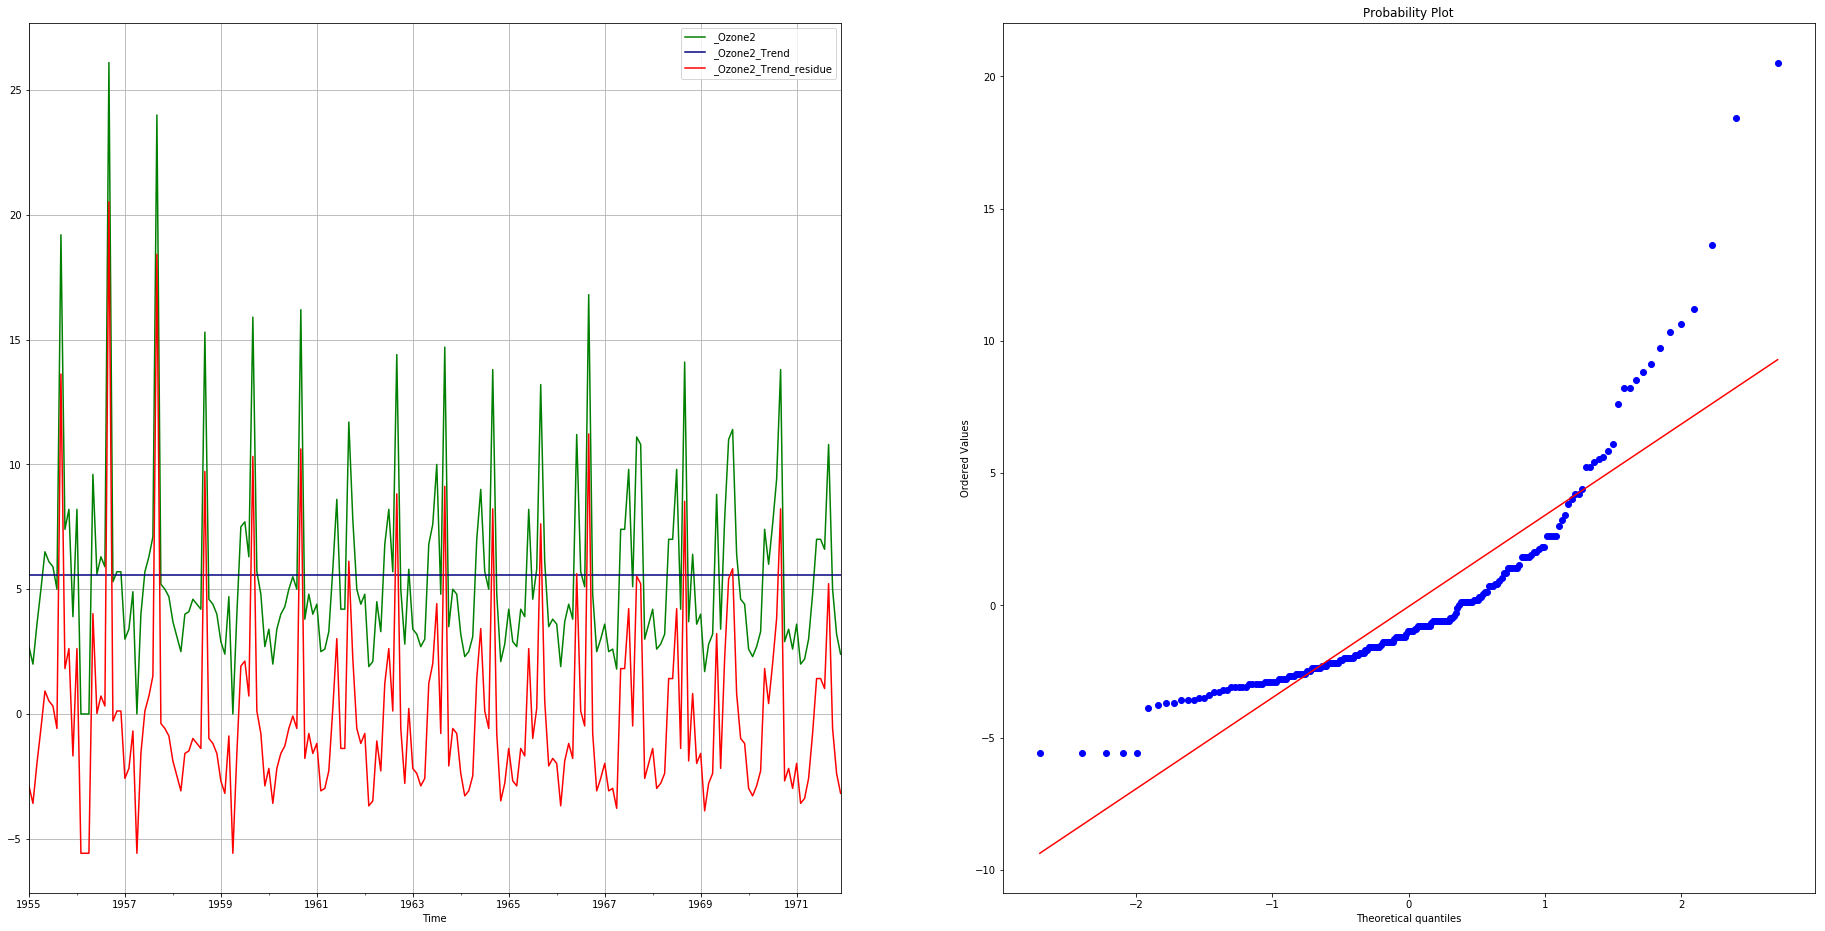

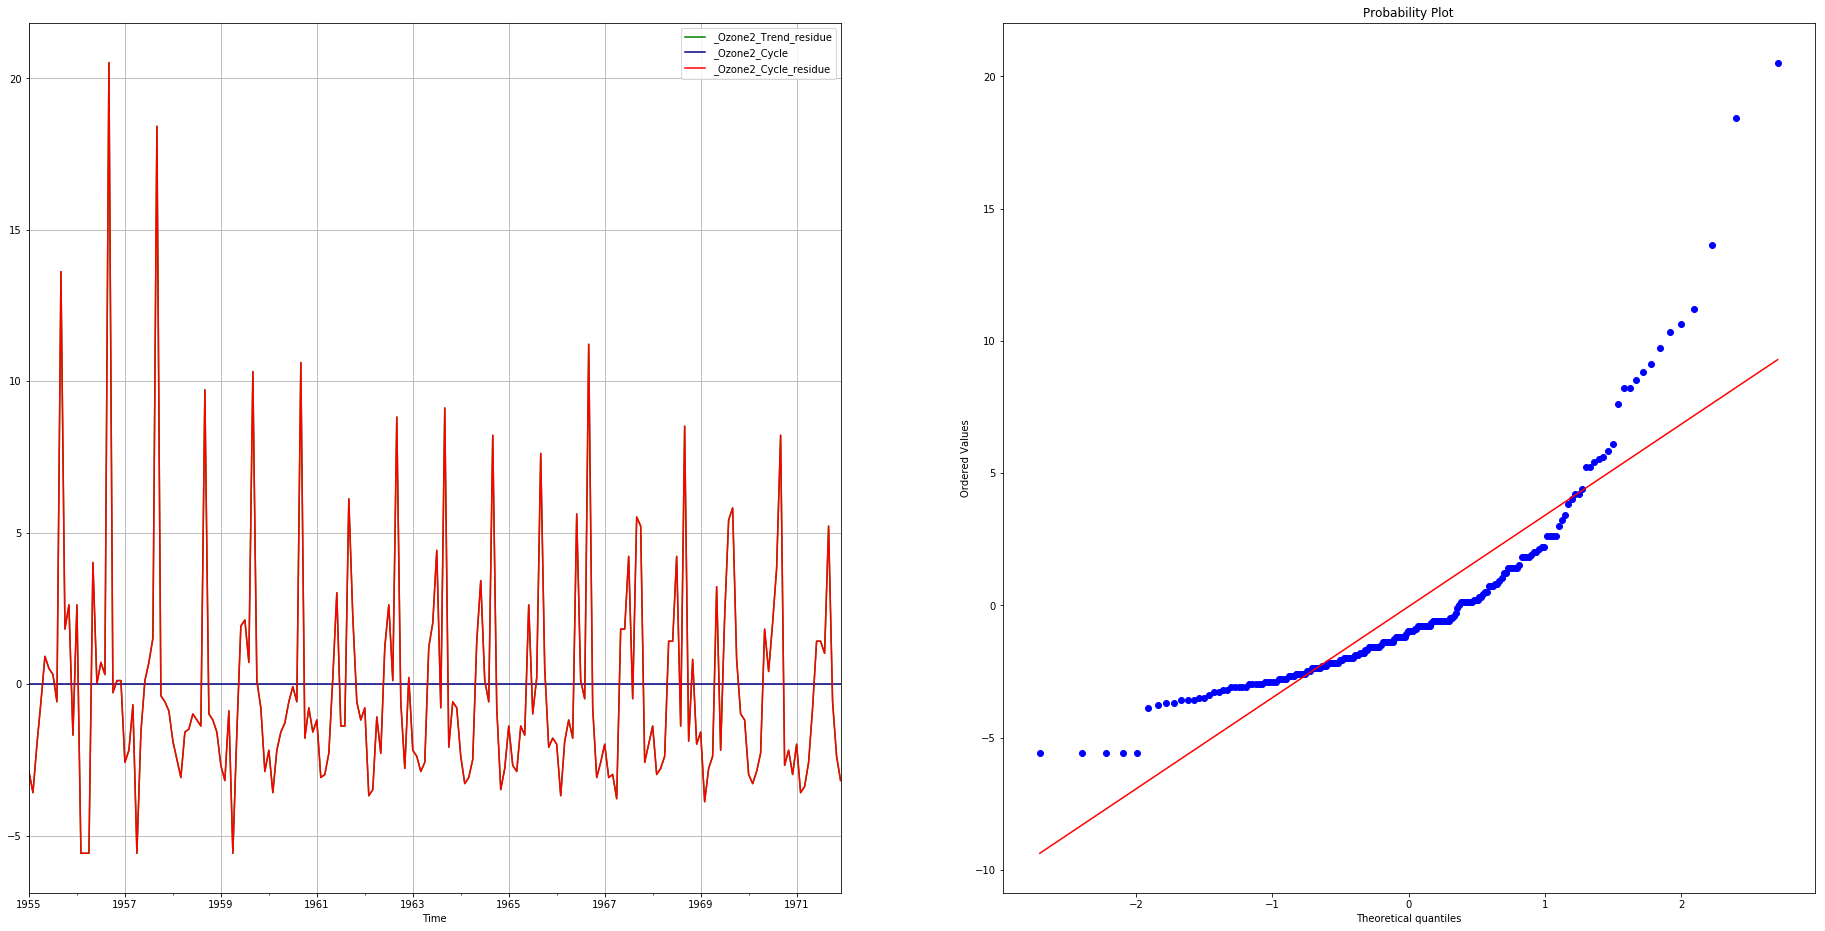

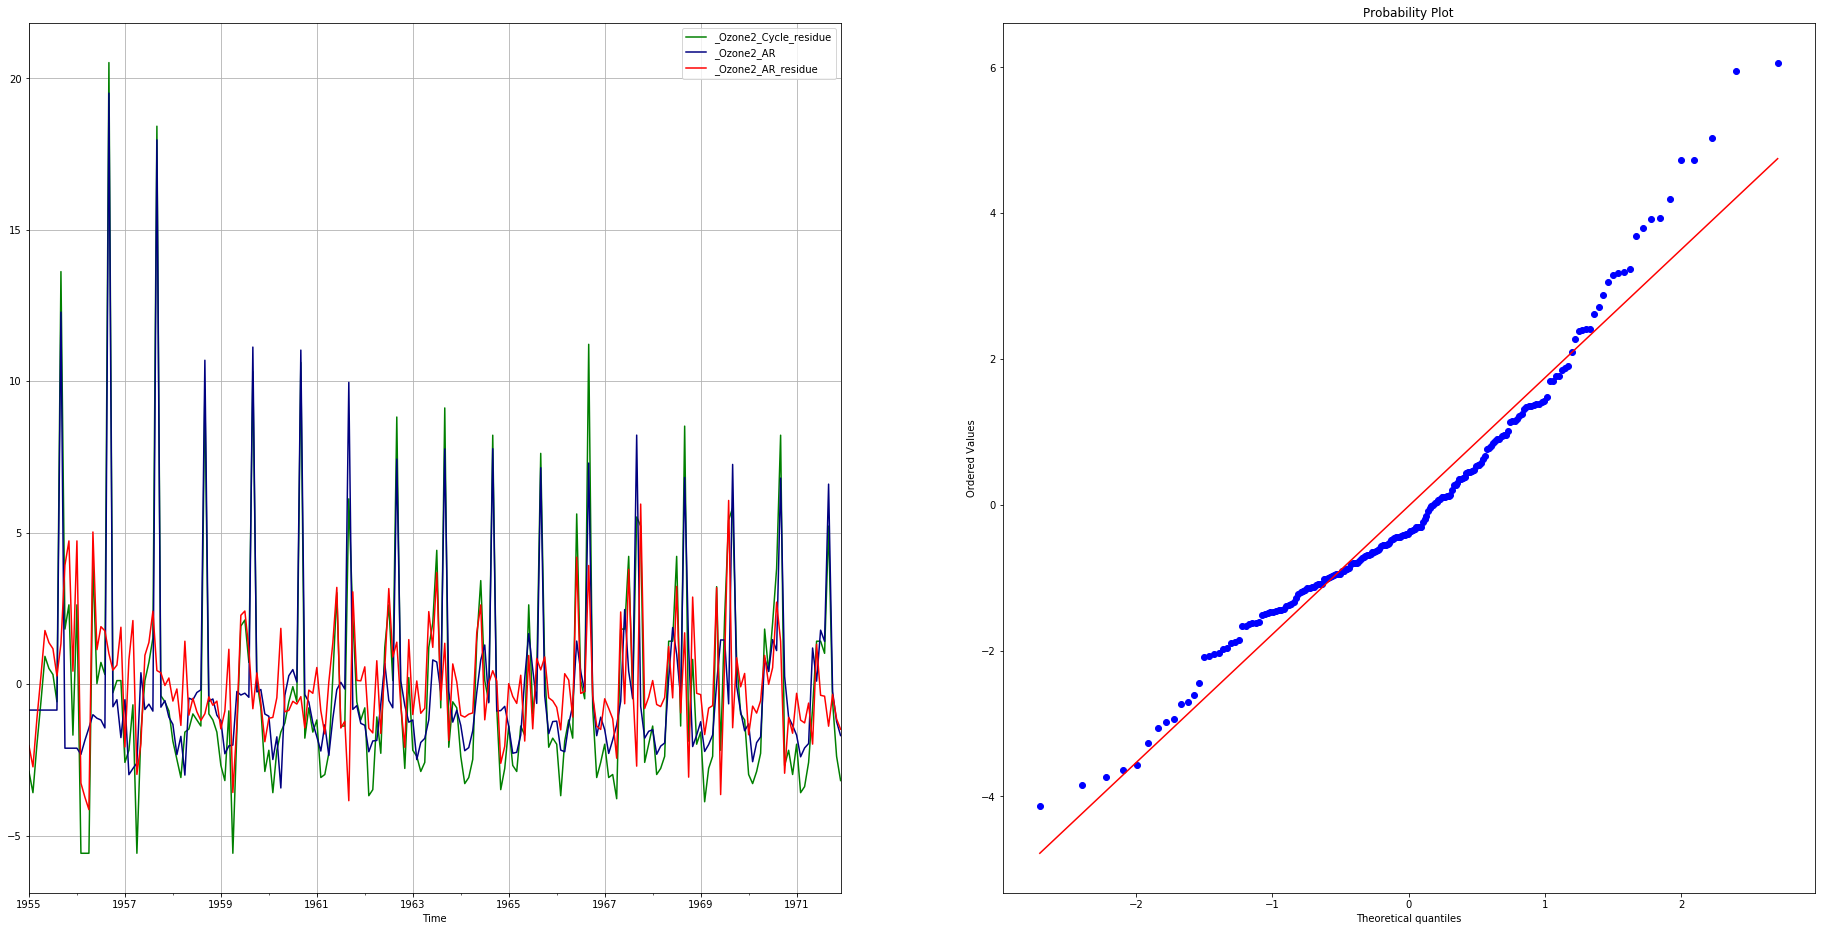

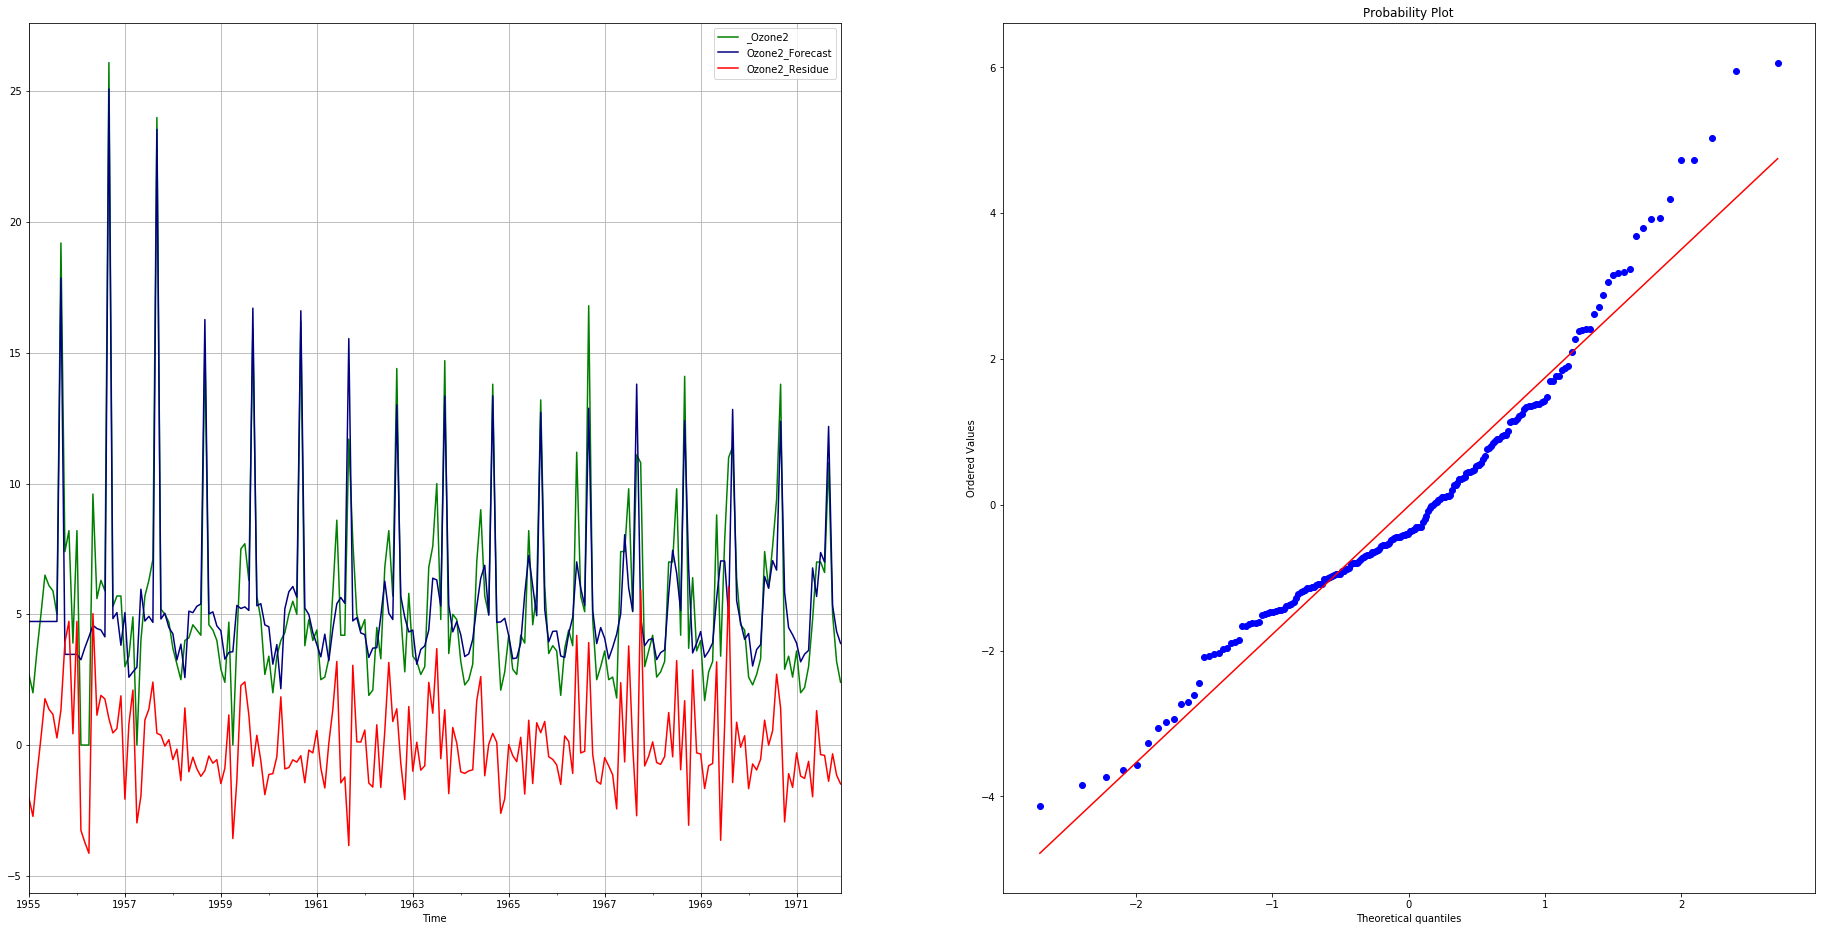

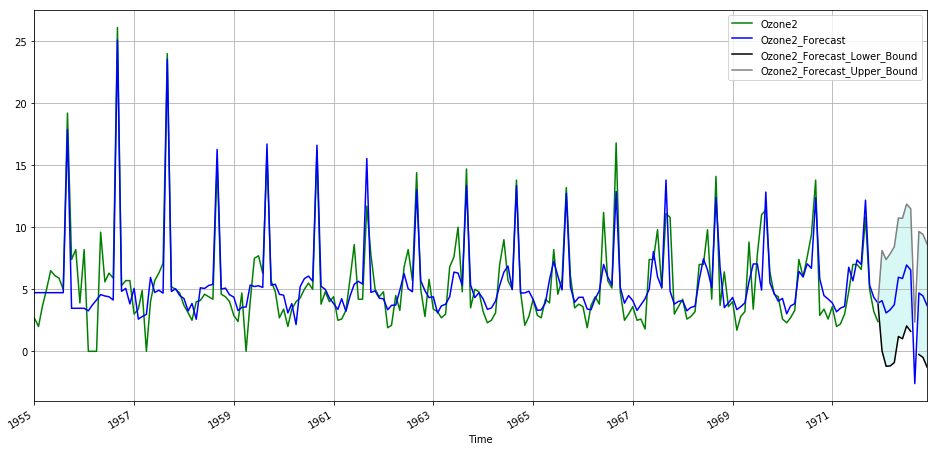

In [17]:
lEngine.standrdPlots()

In [18]:
lEngine.mSignalDecomposition.mBestModel.mTimeInfo.mTimeDelta

numpy.timedelta64(30,'D')

In [19]:
dfapp = df.copy();

In [20]:
dfapp.head()

,Date,Month,Exog2,Exog3,Exog4,Ozone,Time,Ozone2
0,1955-01,1955,1,AQ,P_R,2.7,1955-01-01,2.7
1,1955-02,1955,2,AR,P_R,2.0,1955-02-01,2.0
2,1955-03,1955,3,AS,P_S,3.6,1955-03-01,3.6
3,1955-04,1955,4,AT,P_U,5.0,1955-04-01,5.0
4,1955-05,1955,5,AU,P_V,6.5,1955-05-01,6.5


In [21]:
dfapp1 = lEngine.forecast(dfapp, 36);

INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 13.56264328956604


In [22]:
dfapp1.head()

,Ozone2,Time,_Ozone2,row_number,Time_Normalized,_Ozone2_ConstantTrend,_Ozone2_ConstantTrend_residue,_Ozone2_ConstantTrend_residue_zeroCycle,_Ozone2_ConstantTrend_residue_zeroCycle_residue,Exog2=1,...,_Ozone2_Cycle,_Ozone2_Cycle_residue,_Ozone2_AR,_Ozone2_AR_residue,_Ozone2_TransformedForecast,_Ozone2_TransformedResidue,Ozone2_Forecast,Ozone2_Residue,Ozone2_Forecast_Lower_Bound,Ozone2_Forecast_Upper_Bound
0,2.7,1955-01-01,2.7,0,-1.183208,5.579085,-2.879085,0.0,-2.879085,1.0,...,0.0,-2.879085,-0.852483,-2.026602,4.726602,-2.026602,4.726602,-2.026602,NaN,NaN
1,2.0,1955-02-01,2.0,1,-1.176507,5.579085,-3.579085,0.0,-3.579085,0.0,...,0.0,-3.579085,-0.852483,-2.726602,4.726602,-2.726602,4.726602,-2.726602,NaN,NaN
2,3.6,1955-03-01,3.6,2,-1.170454,5.579085,-1.979085,0.0,-1.979085,0.0,...,0.0,-1.979085,-0.852483,-1.126602,4.726602,-1.126602,4.726602,-1.126602,NaN,NaN
3,5.0,1955-04-01,5.0,3,-1.163753,5.579085,-0.579085,0.0,-0.579085,0.0,...,0.0,-0.579085,-0.852483,0.273398,4.726602,0.273398,4.726602,0.273398,NaN,NaN
4,6.5,1955-05-01,6.5,4,-1.157268,5.579085,0.920915,0.0,0.920915,0.0,...,0.0,0.920915,-0.852483,1.773398,4.726602,1.773398,4.726602,1.773398,NaN,NaN


In [23]:
dfapp1.tail(20)

,Ozone2,Time,_Ozone2,row_number,Time_Normalized,_Ozone2_ConstantTrend,_Ozone2_ConstantTrend_residue,_Ozone2_ConstantTrend_residue_zeroCycle,_Ozone2_ConstantTrend_residue_zeroCycle_residue,Exog2=1,...,_Ozone2_Cycle,_Ozone2_Cycle_residue,_Ozone2_AR,_Ozone2_AR_residue,_Ozone2_TransformedForecast,_Ozone2_TransformedResidue,Ozone2_Forecast,Ozone2_Residue,Ozone2_Forecast_Lower_Bound,Ozone2_Forecast_Upper_Bound
220,NaN,1973-04-24,6.105751,220,0.262533,5.579085,0.526666,0.0,0.526666,0.0,...,0.0,0.526666,0.526666,2.220446e-16,6.105751,0.000000e+00,6.105751,0.000000e+00,NaN,NaN
221,NaN,1973-05-24,5.387501,221,0.269018,5.579085,-0.191584,0.0,-0.191584,0.0,...,0.0,-0.191584,-0.191584,-3.885781e-16,5.387501,0.000000e+00,5.387501,0.000000e+00,NaN,NaN
222,NaN,1973-06-23,6.541300,222,0.275503,5.579085,0.962215,0.0,0.962215,0.0,...,0.0,0.962215,0.962215,4.440892e-16,6.541300,0.000000e+00,6.541300,0.000000e+00,NaN,NaN
223,NaN,1973-07-23,7.047441,223,0.281989,5.579085,1.468356,0.0,1.468356,0.0,...,0.0,1.468356,1.468356,-2.220446e-16,7.047441,0.000000e+00,7.047441,0.000000e+00,NaN,NaN
224,NaN,1973-08-22,-9.470756,224,0.288474,5.579085,-15.049841,0.0,-15.049841,0.0,...,0.0,-15.049841,-15.049841,1.776357e-15,-9.470756,1.776357e-15,-9.470756,1.776357e-15,NaN,NaN
225,NaN,1973-09-21,4.927371,225,0.294959,5.579085,-0.651714,0.0,-0.651714,0.0,...,0.0,-0.651714,-0.651714,3.330669e-16,4.927371,0.000000e+00,4.927371,0.000000e+00,NaN,NaN
226,NaN,1973-10-21,4.407777,226,0.301444,5.579085,-1.171308,0.0,-1.171308,0.0,...,0.0,-1.171308,-1.171308,-2.220446e-16,4.407777,0.000000e+00,4.407777,0.000000e+00,NaN,NaN
227,NaN,1973-11-20,3.964705,227,0.307929,5.579085,-1.614379,0.0,-1.614379,0.0,...,0.0,-1.614379,-1.614379,2.220446e-16,3.964705,0.000000e+00,3.964705,0.000000e+00,NaN,NaN
228,NaN,1973-12-20,4.151206,228,0.314414,5.579085,-1.427879,0.0,-1.427879,0.0,...,0.0,-1.427879,-1.427879,-2.220446e-16,4.151206,0.000000e+00,4.151206,0.000000e+00,NaN,NaN
229,NaN,1974-01-19,3.559227,229,0.320899,5.579085,-2.019858,0.0,-2.019858,0.0,...,0.0,-2.019858,-2.019858,0.000000e+00,3.559227,0.000000e+00,3.559227,0.000000e+00,NaN,NaN


In [24]:
#trdec.mTimeInfo.mTimeDelta